import libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import train_test_split

In [44]:
data=pd.read_csv('Salary_dataset.csv')

data.head()


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [45]:
print(data.isna().sum())
print('-------------------------------------')
data.describe()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64
-------------------------------------


,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


 There's no use of 0 column

In [46]:
data=data.drop(data.columns[0],axis=1)
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


<function matplotlib.pyplot.show(close=None, block=None)>

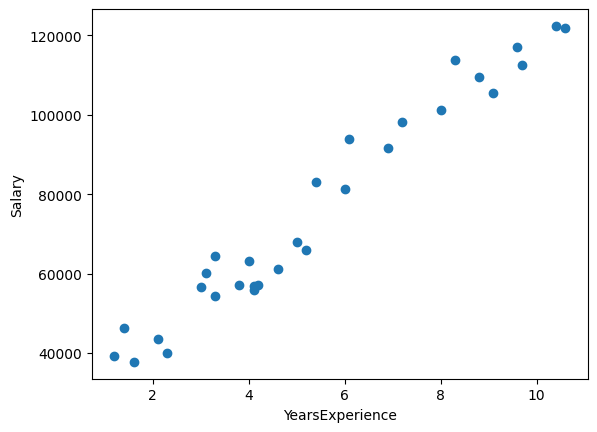

In [47]:
x = data[['YearsExperience']].values
y = data['Salary'].values


plt.scatter(x,y)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show

Try with SVM

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

svc=SVC(kernel='linear')
svc.fit(x_train,y_train)



SVC(kernel='linear')

In [49]:
print(svc.coef_)
print('------------------------')
print(svc.intercept_)

[[ 0.4       ]
 [-0.7       ]
 [-0.5       ]
 [ 0.2       ]
 [-1.17647076]
 [-0.79999999]
 [-0.79999999]
 [-0.90909088]
 [-1.33333338]
 [-0.66666669]
 [-0.83333336]
 [-1.17647076]
 [-0.55555553]
 [-0.58823529]
 [-0.45454547]
 [-0.52631581]
 [-0.37735849]
 [-0.44444445]
 [-0.35714287]
 [-0.3125    ]
 [-0.26666667]
 [-0.27777778]
 [-0.24691358]
 [-0.29850746]
 [-0.25      ]
 [-0.22727272]
 [-1.1       ]
 [-0.9       ]
 [-0.2       ]
 [-0.95238097]
 [-0.68965518]
 [-0.68965518]
 [-0.76923076]
 [-1.0526316 ]
 [-0.58823529]
 [-0.71428575]
 [-0.95238097]
 [-0.49999999]
 [-0.52631579]
 [-0.41666666]
 [-0.47619048]
 [-0.35087719]
 [-0.40816327]
 [-0.33333334]
 [-0.29411765]
 [-0.25316456]
 [-0.2631579 ]
 [-0.23529412]
 [-0.28169014]
 [-0.23809524]
 [-0.2173913 ]
 [ 0.2       ]
 [ 0.9       ]
 [-1.        ]
 [-1.11111132]
 [-1.11111132]
 [-1.33333306]
 [-0.8       ]
 [-0.86956519]
 [-1.17647043]
 [-1.        ]
 [-0.68965518]
 [-0.74074074]
 [-0.54054056]
 [-0.6451613 ]
 [-0.4347826 ]
 [-0.52631

In [50]:
y_pred1=svc.predict(x_train)
y_pred2=svc.predict(x_test)

In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(mean_squared_error(y_train,y_pred1))
print(r2_score(y_train,y_pred1))
print(mean_absolute_error(y_train,y_pred1))
print('----------------------------------------')
print(mean_squared_error(y_test,y_pred2))
print(r2_score(y_test,y_pred2))
print(mean_absolute_error(y_test,y_pred2))

3753798.8518518517
0.9946532698011133
413.44444444444446
----------------------------------------
4196933.666666667
0.9955314897966621
1383.6666666666667


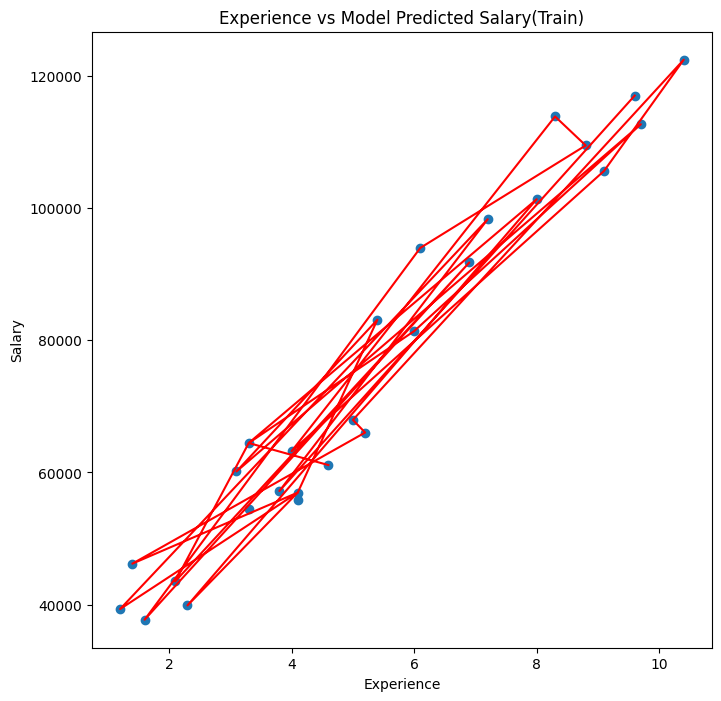

In [52]:
#plotting a scatter plot of Experience vs Model Predicted Salary in Training Data
plt.figure(figsize=(8,8))
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred1,color = "red")
plt.title('Experience vs Model Predicted Salary(Train)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

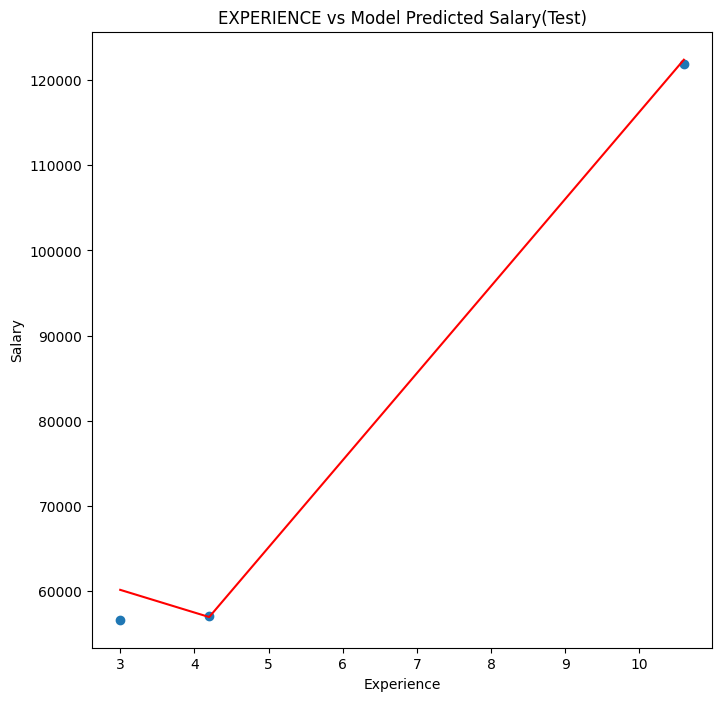

In [53]:
#plotting a scatter plot of Experience vs Model Predicted Salary in Test Data
plt.figure(figsize=(8,8))
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred2,color = "red")
plt.title('EXPERIENCE vs Model Predicted Salary(Test)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

Try with Linear Regression


In [54]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [55]:
#prediction on test and training data
y_pred_1 = lr.predict(x_train)
y_pred_2 = lr.predict(x_test)

print(y_pred_1)
print(y_train)
print('------------------------------------------------------')
print(y_pred_2)
print(y_test)

[116173.50235307  60898.25917252  93300.98793353  36119.70188469
  63757.32347496  38025.74475298  74240.55925059  72334.51638229
 123797.67382625 111408.39518234  62804.30204082 103784.22370916
 108549.33087989  82817.75215791  39931.78762128  90441.92363109
  44696.89479202  56133.15200178 100925.15940671  46602.93766031
  63757.32347496  76146.60211888  54227.10913349 117126.52378722
  81864.73072376  56133.15200178  68522.4306457 ]
[116970.  57190.  98274.  39344.  56958.  46206.  66030.  67939. 122392.
 105583.  63219. 113813. 109432.  93941.  37732.  91739.  43526.  54446.
 101303.  39892.  55795.  83089.  60151. 112636.  81364.  64446.  61112.]
------------------------------------------------------
[125703.71669455  64710.34490911  53274.08769934]
[121873.  57082.  56643.]


In [56]:
print(lr.coef_)

print(lr.intercept_)

[9530.21434147]
24683.44467491915


In [59]:
print(mean_squared_error(y_train,y_pred_1))
print(r2_score(y_train,y_pred_1))
print(mean_absolute_error(y_train,y_pred_1))
print('\n')
print(mean_squared_error(y_test,y_pred_2))
print(r2_score(y_test,y_pred_2))
print(mean_absolute_error(y_test,y_pred_2))

31762918.93939838
0.954758428834222
4627.963555258171


28071868.845255185
0.9701116476159566
4942.657968105271


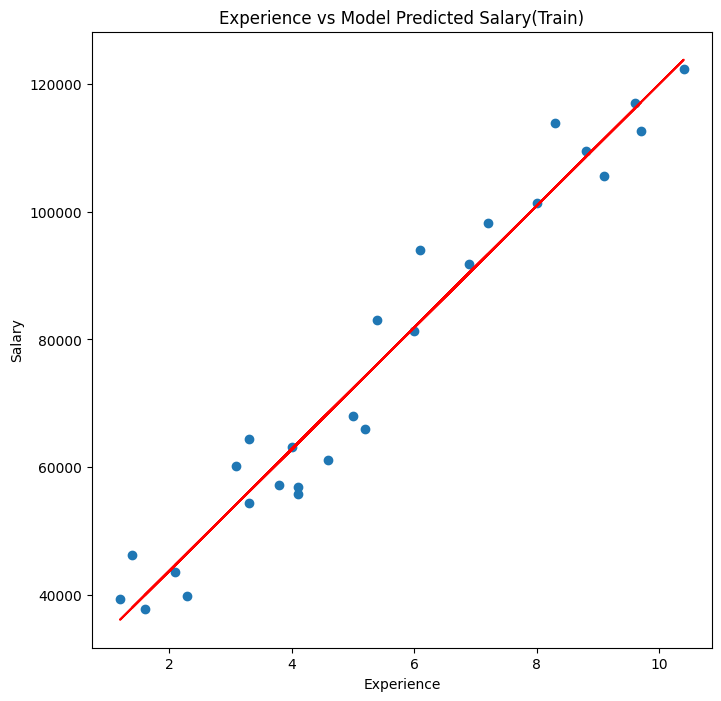

In [60]:

#plotting a scatter plot of Experience vs Model Predicted Salary in Training Data
plt.figure(figsize=(8,8))
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred_1,color = "red")
plt.title('Experience vs Model Predicted Salary(Train)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

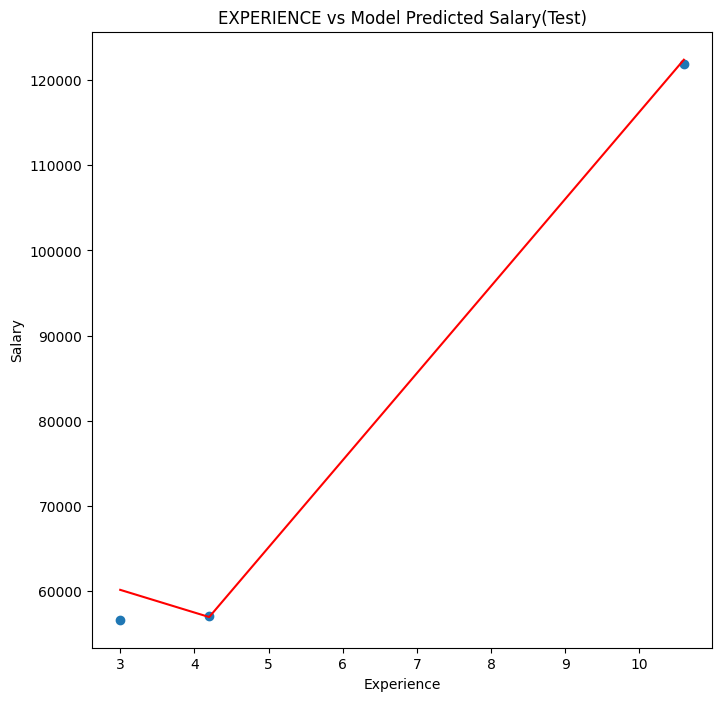

In [61]:
#plotting a scatter plot of Experience vs Model Predicted Salary in Test Data
plt.figure(figsize=(8,8))
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred2,color = "red")
plt.title('EXPERIENCE vs Model Predicted Salary(Test)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()